In [ ]:
!pip install git+https://github.com/gorodion/pycv.git

In [1]:
import cv3
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (3,3)

## Input/Output

<div class="alert alert-block alert-success">
Forget the silence when image didn't read or file not exists
</div>

Read image as RGB (all the input/output operations do BGR2RGB)

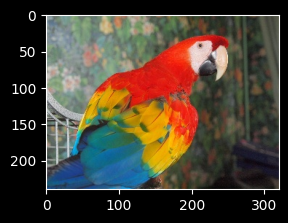

In [2]:
img = cv3.imread('img.jpeg')
plt.imshow(img)

Reading non-existent file

In [3]:
try:
    img = cv3.imread('img0.jpeg')
except FileNotFoundError as exc:
    print('FILE NOT FOUND:', exc)

FILE NOT FOUND: img0.jpeg


Reading not image

In [4]:
try:
    img = cv3.imread('README.md')
except OSError as exc:
    print(exc)

File was not read: README.md


It can even work with pathlib.Path type

In [5]:
impath = Path('img.jpeg')
img = cv3.imread(impath)

Reading image as gray

Image shape: (240, 320)


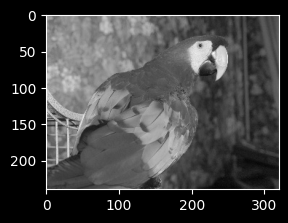

In [6]:
gray = cv3.imread(impath, 'gray')
print('Image shape:', gray.shape)
plt.imshow(gray, cmap='gray')

Now all the input/output operations will be in BGR format (native for cv2)

In [7]:
cv3.opt.set_bgr()

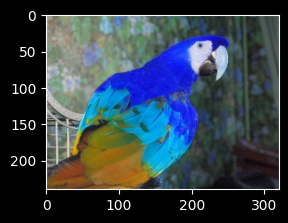

In [8]:
img = cv3.imread('img.jpeg')
plt.imshow(img)

Write to file

In [9]:
cv3.imwrite('img1.jpeg', img)

Image saved in the correct channel order:

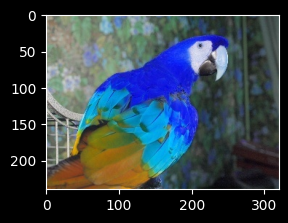

In [10]:
img = cv3.imread('img1.jpeg')
plt.imshow(img)

Set the default value of i/o color space option (RGB)

In [11]:
cv3.opt.set_rgb()

Writing to non-existent folder

In [12]:
cv3.imwrite('somefolder/img2.jpeg', img, mkdir=True)

Imwrite also works with pathlib.Path

In [13]:
save_path = Path('img3.jpeg')
cv3.imwrite(save_path, img)

In [14]:
cv3.imread(save_path);

Showing image in window

In [15]:
cv3.imshow('Demo', img)
cv3.wait_key(0)
cv3.destroyWindow('Demo')

Same using Window class

In [16]:
with cv3.Window('Demo') as ww:
    ww.imshow(img)
    ww.wait_key(0)

Moving window

In [17]:
with cv3.Window('Press any key', pos=(100, 100)) as ww:
    ww.imshow(img)
    ww.wait_key(0)
    ww.move(300, 300)
    ww.wait_key(0)

Multiple windows

In [19]:
with cv3.Windows(['w1', 'w2']) as ws:
    ws['w1'].imshow(img)
    cv3.wait_key(0)

## Color spaces

<div class="alert alert-block alert-success">
Forget <code>cv2.cvtColor(img, cv2.COLOR_BGR2RGB)</code>
</div>

Swap red and blue channels

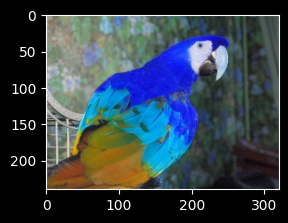

In [27]:
rgb = cv3.imread('img.jpeg')
bgr = cv3.bgr(rgb) # or cv3.rgb
plt.imshow(bgr)

rgb to gray image

Image shape (240, 320)


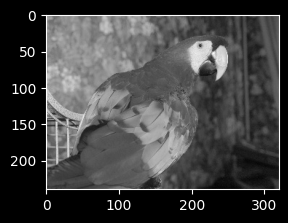

In [29]:
gray = cv3.rgb2gray(rgb)
print('Image shape', gray.shape)
plt.imshow(gray, cmap='gray')

In [36]:
gray_rgb = cv3.rgb(gray)

In [37]:
gray_rgb.shape

(240, 320, 3)

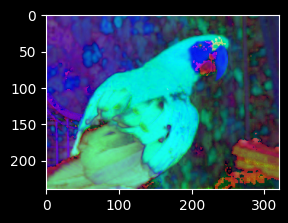

In [38]:
hsv = cv3.rgb2hsv(rgb)
plt.imshow(hsv)

## Transformations

<div class="alert alert-block alert-success">
Forget to copy the same functions from stackoverflow again and again (like rotate, scale, translate)
</div>

Original image

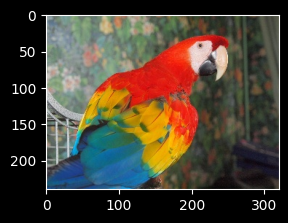

In [39]:
cv3.opt.set_rgb()
img = cv3.imread('img.jpeg')
plt.imshow(img)

Cropping

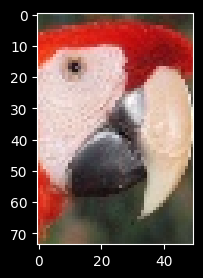

In [40]:
cropped = cv3.crop(img, 200.1, 25.5, 250, 100) # mode is 'xyxy' (i.e. x0,y0,x1,y1)
plt.imshow(cropped)

Cropping by relative values

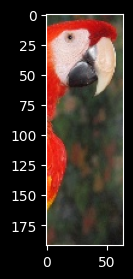

In [41]:
cropped = cv3.crop(img, 0.6, 0.1, 0.8, 0.9, rel=True)
plt.imshow(cropped)

Padding

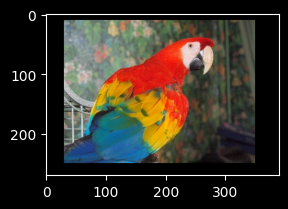

In [42]:
padded = cv3.pad(img, 10, 20.5, 30, 40)
plt.imshow(padded)

Padding by relative values

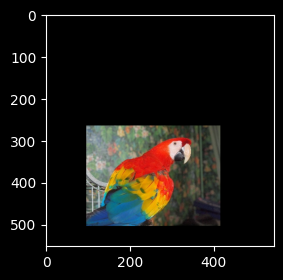

In [43]:
padded = cv3.pad(img, 1.1, 0.2, 0.3, 0.4, rel=True)
plt.imshow(padded)

Change border type

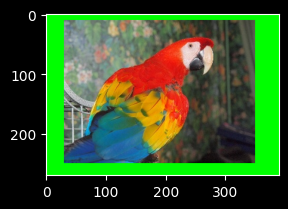

In [44]:
padded = cv3.pad(img, 10, 20, 30, 40, border='constant', value=(0, 255, 0))
plt.imshow(padded)

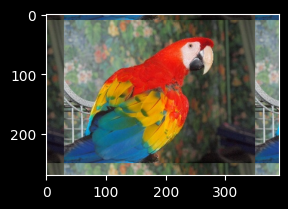

In [45]:
padded = cv3.pad(img, 10, 20, 30, 40, border='wrap')
plt.imshow(padded)

In [46]:
try:
    cv3.pad(img, 10, 20, 30, 40, border='someborder')
except AssertionError as exc:
    print(exc)

no such flag: "someborder". Available: constant, replicate, reflect, wrap, default


Vertical flip

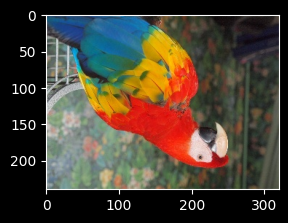

In [47]:
vflip = cv3.vflip(img)
plt.imshow(vflip)

Horizontal flip

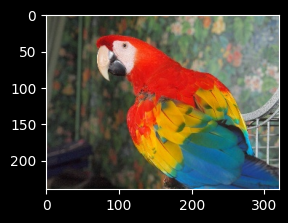

In [48]:
hflip = cv3.hflip(img)
plt.imshow(hflip)

Diagonal flip

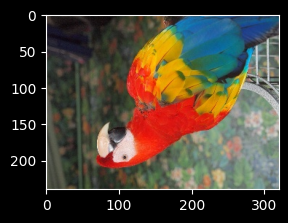

In [49]:
dflip = cv3.dflip(img)
plt.imshow(dflip)

Rotate

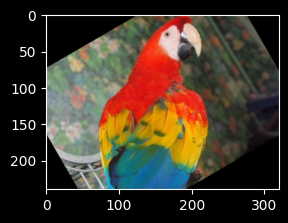

In [50]:
rotated = cv3.rotate(img, 30)
plt.imshow(rotated)

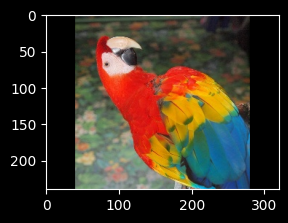

In [51]:
rotated = cv3.rotate90(img) # also cv3.rotate180, cv3.rotate270
plt.imshow(rotated)

Scale

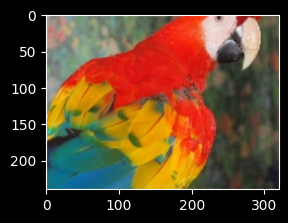

In [52]:
zoomin = cv3.scale(img, 1.5)
plt.imshow(zoomin)

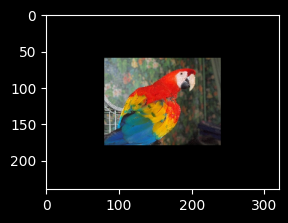

In [53]:
zoomout = cv3.scale(img, 0.5)
plt.imshow(zoomout)

Rotate+scale

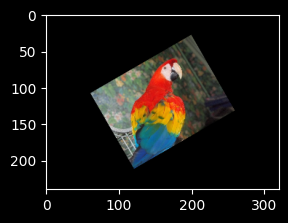

In [54]:
transformed = cv3.transform(img, 30, 0.5)
plt.imshow(transformed)

interpolation

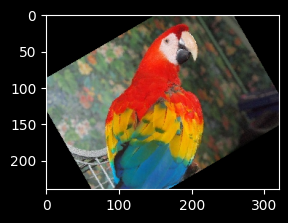

In [55]:
transformed = cv3.transform(img, 30, 0.9, inter='nearest')
plt.imshow(transformed)

In [56]:
try:
    cv3.transform(img, 30, 0.9, inter='some_interpolation')
except AssertionError as exc:
    print(exc)

no such flag: "some_interpolation". Available: nearest, linear, area, cubic, lanczos4


border type

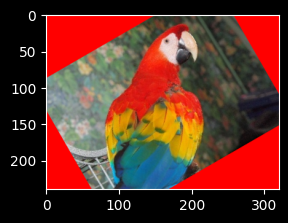

In [57]:
transformed = cv3.transform(img, 30, 0.9, border='constant', value=255)
plt.imshow(transformed)

Translate (shift)

Translate along x-axis

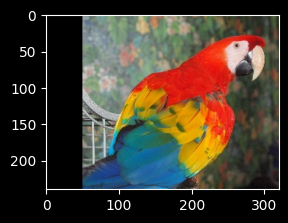

In [58]:
translated = cv3.xshift(img, 50) # or cv3.xtranslate
plt.imshow(translated)

Translate along y-axis

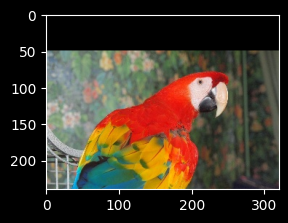

In [59]:
translated = cv3.yshift(img, 50) # or cv3.ytranslate
plt.imshow(translated)

Translate along both axes

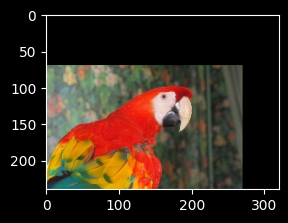

In [60]:
translated = cv3.shift(img, x=-50, y=70) # or cv3.translate
plt.imshow(translated)

Resizing

It resizes even if you pass float arguments

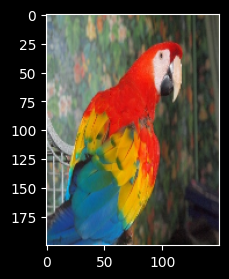

In [61]:
resized = cv3.resize(img, 150, 200.5)
plt.imshow(resized)

Resizing by relative values

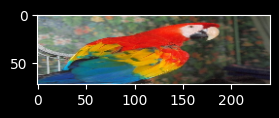

In [62]:
resized = cv3.resize(img, 0.75, 0.3)
plt.imshow(resized)

If scale factors are out of range (0, 1) pass explicit rel=True

In [63]:
try:
    cv3.resize(img, 0.5, 1.3)
except ValueError as exc:
    print(exc)

Width or height have zero size


C:\Users\Rodion Gorodenko\pycv\cv3\transform.py:122: UserWarning: Try to set `rel` to True
  warnings.warn('Try to set `rel` to True')


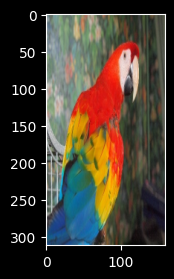

In [64]:
resized = cv3.resize(img, 0.5, 1.3, rel=True)
plt.imshow(resized)

## Drawing

<div class="alert alert-block alert-success">
Forget to pass <i>color</i> when you need to draw a rectangle
</div>
<div class="alert alert-block alert-success">
Forget cast all the parameters to integer
</div>    
<div class="alert alert-block alert-success">
Forget <code>TypeError: Expected cv::UMat for argument</code>
</div>

To draw some shapes you don't have to pass `color` parameter. You can also pass float coordinates

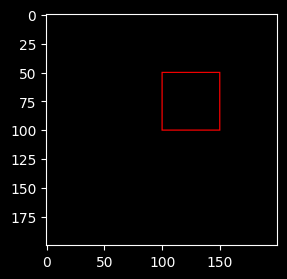

In [65]:
canvas = cv3.zeros(200, 200, 3)
cv3.rectangle(canvas, 100, 50.3, 150.1, 100)
plt.imshow(canvas)

...but you can (as keywords)

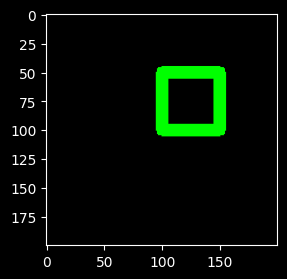

In [66]:
canvas = cv3.zeros(200, 200, 3)
cv3.rectangle(canvas, 100, 50, 150, 100, color="lime", t=10) # as keywords!
plt.imshow(canvas)

And relative coordinates

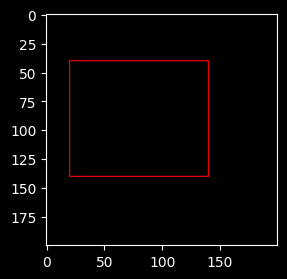

In [67]:
canvas = cv3.zeros(200, 200, 3)
cv3.rectangle(canvas, 0.1, 0.2, 0.7, 0.7, rel=True)
plt.imshow(canvas)

To avoid inplace drawing just pass `copy=True` so it returns copy of an image with the figure

Original image


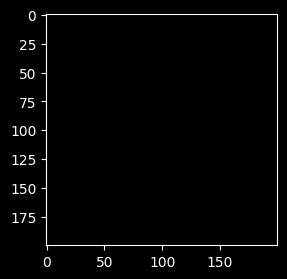

Image with square


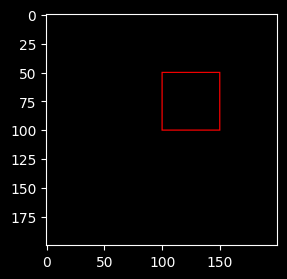

In [68]:
canvas = cv3.zeros(200, 200, 3)
square = cv3.rectangle(canvas, 100, 50, 150, 100, copy=True)

print('Original image')
plt.imshow(canvas)
plt.show()

print('Image with square')
plt.imshow(square)
plt.show()

To change default color or thickness, use `cv3.opt`

In [69]:
cv3.opt.COLOR = [0, 0, 255]
cv3.opt.THICKNESS = 10

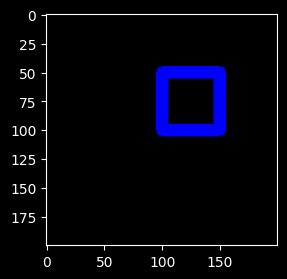

In [70]:
canvas = cv3.zeros(200, 200, 3)
cv3.rectangle(canvas, 100, 50, 150, 100)
plt.imshow(canvas)

In [71]:
cv3.opt.COLOR = (255, 0, 0)
cv3.opt.THICKNESS = 1

For rectangle you also have different modes: `xyxy` (default), `xywh`, `ccwh`

passing arguments in (x0, y0, width, height) mode

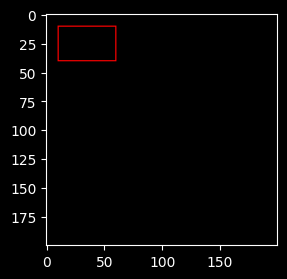

In [72]:
canvas = cv3.zeros(200, 200, 3)
cv3.rectangle(canvas, 10, 10, 50, 30, mode='xywh')
plt.imshow(canvas)

passing arguments in (center_x, center_y, width, height) mode

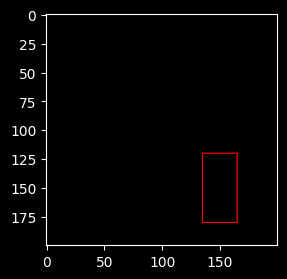

In [73]:
canvas = cv3.zeros(200, 200, 3)
cv3.rectangle(canvas, 150, 150, 30, 60, mode='ccwh')
plt.imshow(canvas)

Other possible figures...

Circle

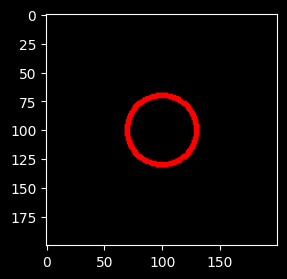

In [74]:
canvas = cv3.zeros(200, 200, 3)
cv3.circle(canvas, 100, 100, 30, t=3)
plt.imshow(canvas)

Point

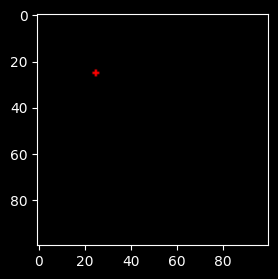

In [75]:
canvas = cv3.zeros(100, 100, 3)
cv3.point(canvas, 25, 25)
plt.imshow(canvas)

Filled circle

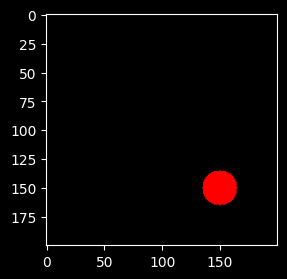

In [76]:
canvas = cv3.zeros(200, 200, 3)
cv3.point(canvas, 150, 150, 15)
plt.imshow(canvas)

Line

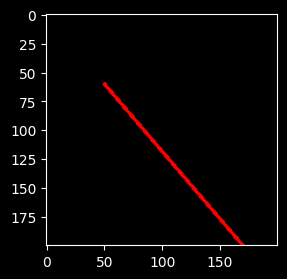

In [77]:
canvas = cv3.zeros(200, 200, 3)
cv3.line(canvas, 50, 60, 170, 200, t=2)
plt.imshow(canvas)

Vertical line

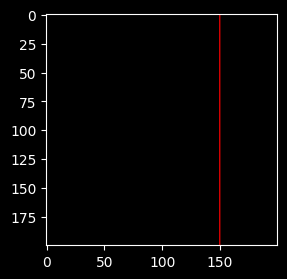

In [78]:
canvas = cv3.zeros(200, 200, 3)
cv3.vline(canvas, 150)
plt.imshow(canvas)

Horizontal line

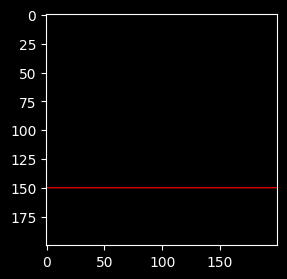

In [79]:
canvas = cv3.zeros(200, 200, 3)
cv3.hline(canvas, 150)
plt.imshow(canvas)

Poly

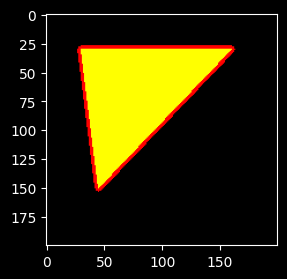

In [80]:
pts = [
    [30, 30],
    [160, 30],
    [45, 150]
]

canvas = cv3.zeros(200, 200, 3)
cv3.polylines(canvas, pts, is_closed=True, color='red', t=5)
cv3.fill_poly(canvas, pts, color='yellow')
plt.imshow(canvas)

Text

<div class="alert alert-block alert-success">
Forget to remember all the 10 parameters (6 is required) of cv2.putText and their order
</div>

You don't need to pass pos of text. By default it's (0, HEIGHT/2)

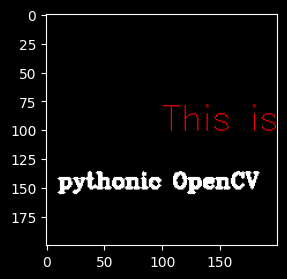

In [81]:
canvas = cv3.zeros(200, 200, 3)
cv3.text(canvas, 'This is') # or cv3.putText
cv3.text(canvas, 'pythonic OpenCV', 10., 150, scale=0.6, font='complex', color="white", t=2)
plt.imshow(canvas)

Flipped text

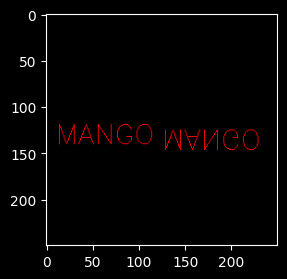

In [82]:
canvas = cv3.zeros(250, 250, 3)
cv3.text(canvas, 'MANGO', x=10, y=140)
cv3.text(canvas, 'MANGO', flip=True)
plt.imshow(canvas)

## Processing

Threshold

In [83]:
try:
    cv3.threshold(img)
except AssertionError as exc:
    print(exc)

`img` must be gray image


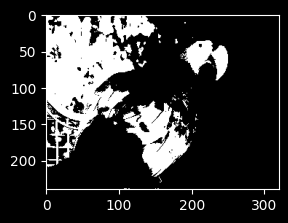

In [84]:
thresh = cv3.threshold(gray) # by default thresh value is 127 and maxval is 255
plt.imshow(thresh, cmap='gray')

## Video

Methods for reading/writing videos have the same features as when working with images (i.e. pathlib.Path, FileNotFound, 'File was not read', opt.RGB, etc)

### Reading video

<div class="alert alert-block alert-success">
Forget </br>
    <code>while cap.isOpened(): 
    ret, frame = cap.read()
    if not ret: 
        break</code>
</div> 
<div class="alert alert-block alert-success">
Forget <code>cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)</code> to get frame count from video </br>
</div>

In [85]:
cap = cv3.Video('vid.mp4') # or cv3.VideoCapture / cv3.VideoReader

Read frame

In [86]:
frame = cap.read()

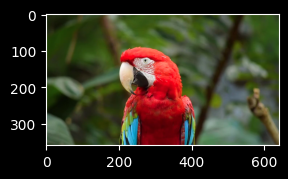

In [87]:
plt.imshow(frame)

Frame count

In [88]:
len(cap)

461

In [89]:
cap.frame_cnt

461

Current frame (from 0 (inclusive) to frame_cnt (exclusive))

In [90]:
cap.now

1

Frames per second

In [91]:
cap.fps

30

Width of frame

In [94]:
cap.width

640

Height of frame

In [95]:
cap.height

360

Shape of frame in format (width, height) (handy for OpenCV functions)

In [96]:
cap.shape

(640, 360)

Iterate over video (!)

In [97]:
for frame in cap:
    if cap.now % 100 == 0:
        print(cap.now, 'frame')

100 frame
200 frame
300 frame
400 frame


In [98]:
try:
    cap.read()
except StopIteration as exc:
    print(exc)

Video has finished


Rewind to nth frame

In [99]:
cap.rewind(150)

In [100]:
cap.now # current frame

150

Get nth frame (rewind + read)

In [101]:
frame = cap[100]

In [102]:
cap.now

101

In [103]:
frame = cap.read()

In [104]:
cap.now

102

Get series of frames

In [105]:
frames = [cv3.resize(frame, 10, 10) for frame in cap]

Closing capture

In [106]:
cap.close() # or cap.release()

In [107]:
try:
    cap.read()
except OSError as exc:
    print(exc)

Video is closed


Context manager

In [108]:
with cv3.Video('vid.mp4') as cap:
    frame = cap.read()
    
print('cap.is_opened:', cap.is_opened)

cap.is_opened: False


### Writing video

<div class="alert alert-block alert-success">
Forget</br>
<code>height, width = frame.shape[:2]
out = cv2.VideoWriter(
    path, 
    cv2.VideoWriter_fourcc('M','P','4','V'), 
    fps, 
    (width, height)
)
out.write(frame)</code>
</div>

In [109]:
out = cv3.Video('output.mp4', 'w') # or cv3.VideoWriter

\_\_init\_\_ of cv2.VideoWriter calls only when the first frame appears

In [110]:
out.shape

(None, None)

In [111]:
out.write(frame)

In [112]:
out.shape

(640, 360)

Let's try to write frame with another shape

In [113]:
try:
    out.write(frame[:100])
except AssertionError as exc:
    print(exc)

Shape mismatch. Required: (640, 360)


In [114]:
out.close() # or out.release()

In [115]:
try:
    out.write(frame)
except OSError as exc:
    print(exc)

Stream is closed


Context manager

In [116]:
with cv3.Video('output.mp4', 'w') as out:
    out.write(frame)
    out.write(frame)

Writing to non-existent folder

In [117]:
with cv3.Video('videos/output.mp4', 'w', mkdir=True) as out:
    out.write(frame)
    out.write(frame)

To change default values of `fourcc` and `fps` use

In [118]:
cv3.opt.video(fps=30, fourcc='mp4v') # default values